# 第1章 统计学习方法概论

1．统计学习是关于计算机基于数据构建概率统计模型并运用模型对数据进行分析与预测的一门学科。统计学习包括监督学习、非监督学习、半监督学习和强化学习。

2．统计学习方法三要素——模型、策略、算法，对理解统计学习方法起到提纲挈领的作用。

3．本书主要讨论监督学习，监督学习可以概括如下：从给定有限的训练数据出发， 假设数据是独立同分布的，而且假设模型属于某个假设空间，应用某一评价准则，从假设空间中选取一个最优的模型，使它对已给训练数据及未知测试数据在给定评价标准意义下有最准确的预测。

4．统计学习中，进行模型选择或者说提高学习的泛化能力是一个重要问题。如果只考虑减少训练误差，就可能产生过拟合现象。模型选择的方法有正则化与交叉验证。学习方法泛化能力的分析是统计学习理论研究的重要课题。

5．分类问题、标注问题和回归问题都是监督学习的重要问题。本书中介绍的统计学习方法包括感知机、$k$近邻法、朴素贝叶斯法、决策树、逻辑斯谛回归与最大熵模型、支持向量机、提升方法、EM算法、隐马尔可夫模型和条件随机场。这些方法是主要的分类、标注以及回归方法。它们又可以归类为生成方法与判别方法。


### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

举例：我们用目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合【例1.1 11页】

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

* ps: numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [2]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [19]:
# ?leastsq

In [9]:
# 十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [np.random.normal(0, 0.1) + y1 for y1 in y_]


def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))  # args为residuals_func函数除p以外的参数
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise data')
    plt.legend()
    return p_lsq

#### M=0

Fitting Parameters: [-0.03772055]


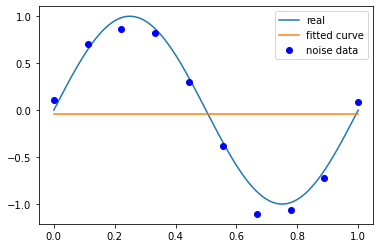

In [15]:
# M=0
p_lsq_0 = fitting(M=0)

#### M=1

Fitting Parameters: [-1.42754256  0.67605073]


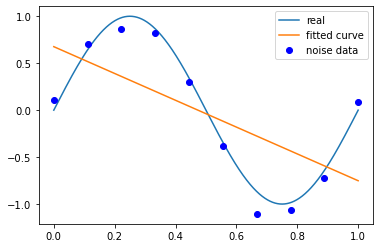

In [11]:
# M=1
p_lsq_1 = fitting(M=1)

####  M=3 

Fitting Parameters: [ 21.9009984  -32.07334443  10.25894653   0.03426116]


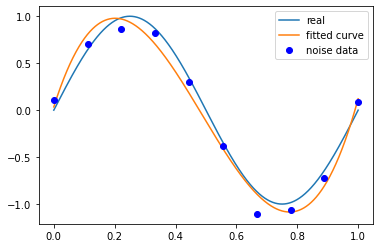

In [18]:
# M=3
p_lsq_3 = fitting(M=3)

#### M=9

Fitting Parameters: [ 2.07540735e+04 -9.16908543e+04  1.70267598e+05 -1.72897867e+05
  1.04486827e+05 -3.81953946e+04  8.15895753e+03 -9.30513392e+02
  4.71607858e+01  1.05207749e-01]


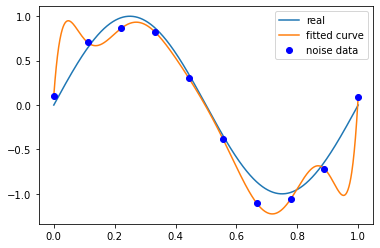

In [13]:
# M=9
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

- L2范数: $L(w)=\frac{1}{N}\sum_{i=1}^N(f(x_i;w)-y_i)^2+\frac{1}{2}\lambda\left \| w \right \| ^2$。
- L1范数：$L(w)=\frac{1}{N}\sum_{i=1}^N(f(x_i;w)-y_i)^2+\lambda\left \| w \right \|_1$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [36]:
regularization = 0.0001

def residuals_func_regularization_l1(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, regularization * np.abs(p))  # L1范数作为正则化项
    return ret

def residuals_func_regularization_l2(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [40]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)  # 初始化9次多项式系数

p_lsq_9 = leastsq(residuals_func, p_init, args=(x, y))

p_lsq_regularization_l1 = leastsq(
    residuals_func_regularization_l1, p_init, args=(x, y))

p_lsq_regularization_l2 = leastsq(
    residuals_func_regularization_l2, p_init, args=(x, y))

print("params:\n", p_lsq_9[0])
print("l1 params:\n", p_lsq_regularization_l1[0])
print("l2 params:\n", p_lsq_regularization_l2[0])

params:
 [ 2.07540735e+04 -9.16908543e+04  1.70267598e+05 -1.72897867e+05
  1.04486827e+05 -3.81953946e+04  8.15895753e+03 -9.30513392e+02
  4.71607858e+01  1.05207749e-01]
l1 params:
 [ 1.93062125e+02 -3.49812865e+02 -5.44748237e+01  2.98425667e+02
  1.15676341e+02 -3.34409489e+02  1.69460464e+02 -4.67041827e+01
  8.75756736e+00  1.09178659e-01]
l2 params:
 [ -7.29635747  -1.60267442   3.98453017   7.86610628   7.91306637
   2.36298899  -7.5159801  -12.47082822   6.74078448   0.10859061]


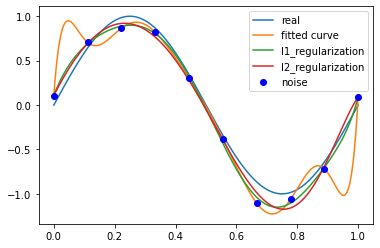

In [38]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization_l1[0], x_points),
    label='l1_regularization')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization_l2[0], x_points),
    label='l2_regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()

### 交叉验证
1. 简单交叉验证
2. S折交叉验证(S-fold cross validation)
3. 留一交叉验证(Leave-one-out cross validation)

    S折交叉验证的特例，$S=N$，$N$为给定数据集的容量。

### 泛化能力(generalization ability)
- 泛化误差

    假设学到的模型为$\hat{f}$，那么用这个模型对未知数据预测的误差为泛化误差(generalization error)：
    
    $
    \begin{aligned}
    R_{\exp }(\hat{f}) &=E_{P}[L(Y, \hat{f}(X))] \\
    &=\int_{\mathcal{X} \times \mathcal{Y}} L(y, \hat{f}(x)) P(x, y) \mathrm{d} x \mathrm{d} y
    \end{aligned}
    $
    
- 泛化误差上界
    
    泛化误差上界通常有以下性质：它是样本容量的函数，当样本容量增加时，泛化上界趋近于0；他是假设空间容量(capacity)的函数，假设空间容量越大，模型就越难学，泛化误差上界就越大。
    
    $R(f) \le \hat{R}(f) + \varepsilon(d, N, \delta)$
    
    第一项是训练误差，训练误差越小，泛化误差就越小；第二项是$N$的单调递减函数，当$N$趋近于无穷时趋近于0；同时它也是$\sqrt{log{d}}$阶的函数，假设空间$\mathcal{F}$包含的函数越多，其值越大。
    
    $\varepsilon(d, N, \delta) = \sqrt{\frac{1}{2N}\left( log{d} + log{\frac{1}{\delta}} \right)}$

## 第1章 统计学习方法概论-习题
**撰写人：**胡锐锋-天国之影-Relph

**github地址：**https://github.com/datawhalechina/statistical-learning-method-solutions-manual

### 习题1.1
&emsp;&emsp;说明伯努利模型的极大似然估计以及贝叶斯估计中的统计学习方法三要素。伯努利模型是定义在取值为0与1的随机变量上的概率分布。假设观测到伯努利模型$n$次独立的数据生成结果，其中$k$次的结果为1，这时可以用极大似然估计或贝叶斯估计来估计结果为1的概率。

**解答：**

伯努利模型的极大似然估计以及贝叶斯估计中的**统计学习方法三要素**如下：  
1. **极大似然估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 经验风险最小化。极大似然估计，等价于当模型是条件概率分布、损失函数是对数损失函数时的经验风险最小化。  
**算法：** 极大化似然 $\underset{p}{\arg \max } L(p \mid X)=\underset{p}{\arg \max } P(X \mid p)$

$$\displaystyle \mathop{\arg\min}_{p} L(p)= \mathop{\arg\min}_{p} \binom{n}{k}p^k(1-p)^{(n-k)}$$

2. **贝叶斯估计**  
**模型：** $\mathcal{F}=\{f|f_p(x)=p^x(1-p)^{(1-x)}\}$  
**策略：** 结构风险最小化。贝叶斯估计中的最大后验概率估计，等价于当模型是条件概率分布、损失函数是对数损失函数、模型复杂度由模型的先验概率表示时的结构风险最小化。  
**算法：** 最大化后验概率。$\underset{p}{\arg \max } \pi(p \mid X)=\underset{p}{\arg \max } \frac{P(X \mid p) \pi(p)}{\int P(X \mid p) \pi(p) d p}$
$$\begin{aligned}  E_\pi\big[p \big| y_1,\cdots,y_n\big]
& = {\int_0^1}p\pi (p|y_1,\cdots,y_n) dp \\
& = {\int_0^1} p\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}dp \\
& = {\int_0^1}\frac{p^{k+1}(1-p)^{(n-k)}}{\int_0^1 p^k(1-p)^{(n-k)}dp}dp
\end{aligned}$$

参考链接：<https://datawhalechina.github.io/statistical-learning-method-solutions-manual/#/chapter01/chapter01>

**伯努利模型的极大似然估计：**  
定义$P(Y=1)$概率为$p$，可得似然函数为：$$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$方程两边同时对$p$求导，则：$$\begin{aligned}
0 & = \binom{n}{k}[kp^{k-1}(1-p)^{(n-k)}-(n-k)p^k(1-p)^{(n-k-1)}]\\
& = \binom{n}{k}[p^{(k-1)}(1-p)^{(n-k-1)}(m-kp)]
\end{aligned}$$可解出$p$的值为$p=0,p=1,p=k/n$，显然$\displaystyle P(Y=1)=p=\frac{k}{n}$  

**伯努利模型的贝叶斯估计：**  
定义$P(Y=1)$概率为$p$，$p$在$[0,1]$之间的取值是等概率的，因此先验概率密度函数$\pi(p) = 1$，可得似然函数为： $$L(p)=f_D(y_1,y_2,\cdots,y_n|\theta)=\binom{n}{k}p^k(1-p)^{(n-k)}$$  
根据似然函数和先验概率密度函数，可以求解$p$的条件概率密度函数：$$\begin{aligned}\pi(p|y_1,\cdots,y_n)&=\frac{f_D(y_1,\cdots,y_n|p)\pi(p)}{\int_{\Omega}f_D(y_1,\cdots,y_n|p)\pi(p)dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{\int_0^1p^k(1-p)^{(n-k)}dp}\\
&=\frac{p^k(1-p)^{(n-k)}}{B(k+1,n-k+1)}
\end{aligned}$$所以$p$的期望为：$$\begin{aligned}
E_\pi[p|y_1,\cdots,y_n]&={\int}p\pi(p|y_1,\cdots,y_n)dp \\
& = {\int_0^1}\frac{p^{(k+1)}(1-p)^{(n-k)}}{B(k+1,n-k+1)}dp \\
& = \frac{B(k+2,n-k+1)}{B(k+1,n-k+1)}\\
& = \frac{k+1}{n+2}
\end{aligned}$$
$\therefore \displaystyle P(Y=1)=\frac{k+1}{n+2}$

### 习题1.2
&emsp;&emsp;通过经验风险最小化推导极大似然估计。证明模型是条件概率分布，当损失函数是对数损失函数时，经验风险最小化等价于极大似然估计。

**解答：**

假设模型的条件概率分布是$P_{\theta}(Y|X)$，现推导当损失函数是对数损失函数时，极大似然估计等价于经验风险最小化。  
对数损失函数为：$L(Y, P(Y \mid X))=-\log P(Y \mid X)$  
可得：  
$$
\begin{aligned}
\underset{f \in \mathcal{F}}{\arg \min } \frac{1}{N} \sum_{i=1}^{N} L\left(y_{i}, f\left(x_{i}\right)\right) &=\underset{f \in \mathcal{F}}{\arg \min } \frac{1}{N} \sum_{D}[-\log P(Y \mid X)] \\
&=\underset{f \in \mathcal{F}}{\arg \max } \frac{1}{N} \sum_{D} \log P(Y \mid X) \\
&=\underset{f \in \mathcal{F}}{\arg \max } \frac{1}{N} \log \prod_{D} P(Y \mid X) \\
&=\frac{1}{N} \underset{f \in \mathcal{F}}{\arg \max } \log \prod_{D} P(Y \mid X)
\end{aligned}
$$

即$\underset{f \in \mathcal{F}}{\arg \min } \frac{1}{N} \sum_{i=1}^{N} L\left(y_{i}, f\left(x_{i}\right)\right)=\frac{1}{N} \underset{f \in \mathcal{F}}{\arg \max } \log L(\theta)$  
即经验风险最小化等价于极大似然估计，得证。

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

本文代码更新地址：https://github.com/fengdu78/lihang-code

习题解答：https://github.com/datawhalechina/statistical-learning-method-solutions-manual

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)